In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
tf.config.run_functions_eagerly(False) 
#tfds.disable_progress_bar()

In [2]:
tf.version.VERSION

'2.6.0'

In [3]:
import pandas as pd 

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/sentiment-dataset/airline_sentiment_analysis.csv")

In [5]:
print (dataset[:10])
print (dataset[len(dataset) - 10:])

   Unnamed: 0  ...                                               text
0           1  ...  @VirginAmerica plus you've added commercials t...
1           3  ...  @VirginAmerica it's really aggressive to blast...
2           4  ...  @VirginAmerica and it's a really big bad thing...
3           5  ...  @VirginAmerica seriously would pay $30 a fligh...
4           6  ...  @VirginAmerica yes, nearly every time I fly VX...
5           8  ...    @virginamerica Well, I didn't…but NOW I DO! :-D
6           9  ...  @VirginAmerica it was amazing, and arrived an ...
7          11  ...  @VirginAmerica I &lt;3 pretty graphics. so muc...
8          12  ...  @VirginAmerica This is such a great deal! Alre...
9          13  ...  @VirginAmerica @virginmedia I'm flying your #f...

[10 rows x 3 columns]
       Unnamed: 0  ...                                               text
11531       14627  ...  @AmericanAir Flight Cancelled Flightled, can't...
11532       14628  ...  Thank you. “@AmericanAir: @jlhalldc

In [6]:
def process(txt):
  return ' '.join(word for word in txt.split(' ') if not word.startswith('@'))

process(" word1 word2     word3 @word4 word5   word6")

' word1 word2     word3 word5   word6'

In [7]:
dataset_processed = pd.DataFrame.copy(dataset, deep=True)

dataset_processed['text'] = dataset['text'].apply(process)
print(dataset_processed[:3])
print(dataset_processed[len(dataset_processed) - 3:])


   Unnamed: 0  ...                                               text
0           1  ...  plus you've added commercials to the experienc...
1           3  ...  it's really aggressive to blast obnoxious "ent...
2           4  ...           and it's a really big bad thing about it

[3 rows x 3 columns]
       Unnamed: 0  ...                                               text
11538       14635  ...  thank you we got on a different flight to Chic...
11539       14636  ...  leaving over 20 minutes Late Flight. No warnin...
11540       14638  ...  you have my money, you change my flight, and d...

[3 rows x 3 columns]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def process_label(label):
  if label == "negative":
    return 0
  elif label == "positive":
    return 1
  raise Exception("unrecognized label")

In [10]:
dataset_processed['airline_sentiment'] = dataset_processed['airline_sentiment'].apply(process_label)

In [11]:
dataset_train, dataset_test = train_test_split(dataset_processed, test_size = 0.2)

In [12]:
dataset_train[100:125]

,Unnamed: 0,airline_sentiment,text
8867,11457,0,"Spoke on the phone 3 or 4 times, but no resolu..."
2986,3741,1,can I just go ahead and live in your premium c...
4861,6280,1,oh my god LAUREN OH MY GOD OH MY GOD
409,605,0,I tried but no one was available in bogota and...
3001,3757,0,"still can't dm, it's LH7631 on 21/2/15"
7418,9800,0,Any word on accommodations for the passengers ...
1853,2333,0,"no, your service here pretty much ruined my da..."
11026,14053,0,already did &amp; an automated voice told us t...
1478,1878,0,who authors this fiction? I just heard on radi...
946,1252,0,We were supposed to board at 605. They just br...


In [13]:
len(dataset_train)

9232

In [14]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [15]:
dataset_train_text_tf = tf.convert_to_tensor(dataset_train['text'], dtype=tf.string)
dataset_train_label_tf = tf.convert_to_tensor(dataset_train['airline_sentiment'], dtype=tf.float32)

dataset_test_text_tf = tf.convert_to_tensor(dataset_test['text'], dtype=tf.string)
dataset_test_lable_tf = tf.convert_to_tensor(dataset_test['airline_sentiment'], dtype=tf.float32)

dataset_train_tf = tf.data.Dataset.from_tensor_slices((dataset_train_text_tf, dataset_train_label_tf))
dataset_test_tf = tf.data.Dataset.from_tensor_slices((dataset_test_text_tf, dataset_test_lable_tf))


In [16]:
count = 10
i = 0
for ele in dataset_train_tf.as_numpy_iterator():
  if i >= count: 
    break
  print (ele)
  i += 1

(b'why must you always delay my Late Flight night Orlando flights? \xf0\x9f\x92\x94', 0.0)
(b'So appreciated!', 1.0)
(b'thanks, keep up the good work', 1.0)
(b"we never received that $15 credit for inoperable tv's on our SFO &gt; JFK flight 2 weeks ago. never got an email...", 0.0)
(b'what response? Is our flight out of Montrose Cancelled Flightled or not?', 0.0)
(b"so you don't have a pilot now for #clt \xe2\x9c\x88 #ord for at least another hour. Why on earth would you board the plane? Makes no sense!", 0.0)
(b"LUV Ya Too!!!!  I will sing a song for y'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR", 1.0)
(b"she's the type of person that can make a customers day! I fly 100+ times a year &amp; she's one of the top flight attendants I've had!", 1.0)
(b"really not acceptable. Just informed plane won't start. Chartering bus to take passengers to jfk.", 0.0)
(b'Also, been on hold for 30 minutes with your "customer service" to find out when my new flight is sche

In [17]:
train_dataset_batched_tf = dataset_train_tf.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_batched_tf = dataset_test_tf.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [18]:
count = 1
i = 0
for ele in train_dataset_batched_tf.as_numpy_iterator():
  if i >= count: 
    break
  print (ele)
  i += 1

(array([b"Fine. Would you have them call me? I left a message, was told it would be 2 hours for a call. Haven't heard anything yet.",
       b"thanks! Y'all have some of the best customer service left in the industry.",
       b"it's been 2 hrs of wait on the phone a) worst customer services b) trying to know where my suitcase Is and way MORE \xf0\x9f\x98\xa4#ANGRY",
       b"I cheated on you, and I'm sorry. I'll never do it again. has given my wife and I the worst start to a honeymoon ever",
       b'a $100 - totaled. Not happy. Not at all.',
       b'is gettin fancy! #Mint #LieFlat Nice work on the menu #LobsterMac #BloodyMary #JetSetter http://t.co/zf5wjgtXzT',
       b"when trying to check-in online, it says to call...now I've been on hold for 2 hours...what to do?",
       b'.@USAirways trying to get a partner PNR, and have spent more than 1 hour on hold.  I know its snowing somewhere, but this is awful',
       b'not an issue but I think training &amp; information would help. Gre

In [19]:
print(dataset_train_tf)
print(dataset_test_tf)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>
<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>


In [20]:
#VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization()
    #max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset_batched_tf.map(lambda text, label: text))

In [ ]:
count_0 = len(train_dataset_batched_tf)
count = 0
for ds in train_dataset_batched_tf:
  count += len(ds[0])
  print(len(ds[0]))
count

In [22]:
encoder("hello world HELLO WORLD")[:].numpy()

array([977, 754, 977, 754])

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [24]:
vocab = np.array(encoder.get_vocabulary())
vocab[100:150]

array(['were', 'because', 'great', 'wait', '3', 'u', 'trying', 'ive',
       'day', 'then', 'never', 'fly', 'did', 'only', 'airport', 'delay',
       'really', 'even', 'any', 'minutes', 'home', 'going', '4', 'united',
       'last', 'people', 'agent', 'weather', 'very', 'make', 'bags',
       'should', 'off', 'know', 'another', 'luggage', 'told', 'good',
       'worst', 'way', 'take', 'flying', 'lost', 'go', 'them', 'ever',
       'here', 'hrs', 'crew', 'than'], dtype='<U46')

In [25]:
for example, label in dataset_train_tf.take(1):
  print('texts: ', example.numpy())
  print()
  print('labels: ', label.numpy())

texts:  b'why must you always delay my Late Flight night Orlando flights? \xf0\x9f\x92\x94'

labels:  0.0


In [26]:
model = tf.keras.Sequential([
      encoder,
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1) #, activation='sigmoid')
  ])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          770176    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [28]:
encoder("hello world. This is great").numpy()

array([977, 754,  25,  12, 102])

In [29]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']) #run_eagerly=True)

In [30]:
history = model.fit(train_dataset_batched_tf, epochs=10,
                    validation_data=test_dataset_batched_tf,
                    validation_steps=30)

Epoch 1/10
145/145 [==============================] - 20s 87ms/step - loss: 0.6000 - accuracy: 0.7973 - val_loss: 0.4479 - val_accuracy: 0.7917
Epoch 2/10
145/145 [==============================] - 10s 71ms/step - loss: 0.4006 - accuracy: 0.7973 - val_loss: 0.3862 - val_accuracy: 0.7917
Epoch 3/10
145/145 [==============================] - 10s 71ms/step - loss: 0.3055 - accuracy: 0.7973 - val_loss: 0.3105 - val_accuracy: 0.7917
Epoch 4/10
145/145 [==============================] - 10s 72ms/step - loss: 0.2383 - accuracy: 0.7973 - val_loss: 0.2937 - val_accuracy: 0.7917
Epoch 5/10
145/145 [==============================] - 10s 72ms/step - loss: 0.1840 - accuracy: 0.8438 - val_loss: 0.2728 - val_accuracy: 0.8823
Epoch 6/10
145/145 [==============================] - 10s 71ms/step - loss: 0.1276 - accuracy: 0.9469 - val_loss: 0.2823 - val_accuracy: 0.9141
Epoch 7/10
145/145 [==============================] - 10s 71ms/step - loss: 0.0915 - accuracy: 0.9742 - val_loss: 0.3264 - val_accuracy:

In [31]:
test_loss, test_acc = model.evaluate(test_dataset_batched_tf)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

37/37 [==============================] - 1s 16ms/step - loss: 0.3950 - accuracy: 0.9181
Test Loss: 0.3949778378009796
Test Accuracy: 0.9181463718414307


In [32]:

sample_text = ('good it\'s great')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('bad. It\'s very bad. Worse')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('This airlines is the best')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will never fly with you')
predictions = model.predict(np.array([sample_text]))
print(predictions)


sample_text = ('I will never recommend you')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will always recommend you')
predictions = model.predict(np.array([sample_text]))
print(predictions)


sample_text = ('Will be a long time before I recommend you to anyone.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I liked the way you guys organize yourself')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[2.4241579]]
[[-3.679005]]
[[1.5192201]]
[[-1.4085932]]
[[-0.5680525]]
[[1.4155738]]
[[-3.8368037]]
[[0.36423916]]


In [33]:
model.set_weights

<bound method Layer.set_weights of <keras.engine.sequential.Sequential object at 0x7fe04a56a410>>

In [34]:
encoder_new= None
encoder_new = tf.keras.layers.TextVectorization()

In [35]:
encoder_new.get_config()

{'dtype': 'string',
 'max_tokens': None,
 'name': 'text_vectorization_1',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

In [36]:
encoder_new.adapt(np.array([['hell']], dtype=np.object), batch_size=None)

In [37]:
encoder_new.set_weights(encoder.get_weights())

In [38]:
encoder("hello world").numpy()

array([977, 754])

In [39]:
encoder_new("hello world").numpy()

array([977, 754])

In [40]:
model2 = tf.keras.Sequential([
      encoder,
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1) #, activation='sigmoid')
  ])

In [41]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']) #run_eagerly=True)

In [42]:
layers = []
for layer in model.layers:
  layers.append(layer.get_weights())

In [43]:
i  = 0
for layer in model2.layers:
  # if i == 0:
  #   i += 1
  #   continue
  print(layer.get_weights()[0].dtype)
  layer.set_weights(layers[i])
  i += 1

object
float32
float32
float32
float32
float32
float32
float32


In [44]:
sample_text = ('good it\'s great')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

sample_text = ('bad. It\'s very bad. Worse')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

sample_text = ('This airlines is the best')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will never fly with you')
predictions = model2.predict(np.array([sample_text]))
print(predictions)


sample_text = ('I will never recommend you')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will always recommend you')
predictions = model2.predict(np.array([sample_text]))
print(predictions)


sample_text = ('Will be a long time before I recommend you to anyone.')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I liked the way you guys organize yourself')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

[[2.4241579]]
[[-3.679005]]
[[1.5192201]]
[[-1.4085932]]
[[-0.5680525]]
[[1.4155738]]
[[-3.8368037]]
[[0.36423916]]


In [45]:
import json


In [95]:
class NdarrayEncoder(json.JSONEncoder):
  def default(self, obj):
    if isinstance(obj, np.ndarray):
      return obj.tolist()
    if isinstance(obj, bytes):
      return obj.decode('utf-8')
    print(obj)
    return json.JSONEncoder().default(self, obj)

In [96]:
layersInList = []

for layer in model.layers:
  layersInList.append(layer.get_weights())

In [97]:
weightsInJson = json.dumps(layersInList, cls=NdarrayEncoder)


In [98]:
with open("weights.json", "w") as json_file:
  json_file.write(weightsInJson)

In [99]:
with open("weights.json", "r") as json_file_r:
  weightsInListRead = json_file_r.read()

In [100]:
weightsReadData = json.loads(weightsInListRead)

In [101]:
# def isIterable(obj):
#   if hasattr(obj, '__iter__') and hasattr(obj, '__next__') and hasattr('__getitem__'):
#     return True
#   return False

def convertStringToBytesInObject(convertableObj):
  if isinstance(convertableObj, list):
    i = 0
    for item in convertableObj:
      if isinstance(item, str):
        convertableObj[i] = item.encode()
      elif isinstance(item, list): 
        convertStringToBytesInObject(item)
      i += 1
  else:
    print(convertableObj)
    raise Exception(" expected to be iterable ")



In [102]:
isIterable([])

False

In [103]:
# convertStringToBytesInObject(weightsReadData)

In [104]:
encoder_new= None
encoder_new = tf.keras.layers.TextVectorization()

In [105]:
encoder_new.get_config()

{'dtype': 'string',
 'max_tokens': None,
 'name': 'text_vectorization_3',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

In [106]:
encoder_new.adapt(np.array([['hell']], dtype=np.object), batch_size=None)

In [107]:
encoder_new.set_weights(weightsReadData[0])

In [108]:
encoder_new("hello world").numpy()

array([977, 754])

In [109]:
encoder("hello world").numpy()

array([977, 754])

In [110]:
model3 = tf.keras.Sequential([
      encoder_new,
      tf.keras.layers.Embedding(
          input_dim=len(encoder_new.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1) #, activation='sigmoid')
  ])

In [111]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']) #run_eagerly=True)

In [165]:
layers2 = []
for layerWeights in weightsReadData:
  layers2.append(layerWeights)
  print(len(layerWeights))

1
1
6
2
2
2
2
2


In [163]:
def convertToNdarray(obj):
  if isinstance(obj, list):
    return np.asarray([convertToNdarray(o) for o in obj])
  else:
    return obj


In [166]:
layers2 = convertToNdarray(layers2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [161]:
layers2 = [np.array(layer, dtype=object) for layer in layers2]

In [167]:
i  = 0
for layer in model3.layers:
  # if i == 0:
  #   i += 1
  #   continue
  print(layer.get_weights()[0].dtype)
  layer.set_weights(layers2[i])
  i += 1

object
float32
float32
float32
float32
float32
float32
float32


In [168]:
sample_text = ('good it\'s great')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

sample_text = ('bad. It\'s very bad. Worse')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

sample_text = ('This airlines is the best')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will never fly with you')
predictions = model3.predict(np.array([sample_text]))
print(predictions)


sample_text = ('I will never recommend you')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I will always recommend you')
predictions = model3.predict(np.array([sample_text]))
print(predictions)


sample_text = ('Will be a long time before I recommend you to anyone.')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

sample_text = ('I liked the way you guys organize yourself')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

[[2.4241579]]
[[-3.679005]]
[[1.5192201]]
[[-1.4085932]]
[[-0.5680525]]
[[1.4155738]]
[[-3.8368037]]
[[0.36423916]]


In [114]:
len(weightsReadData)

8

In [115]:
len(model3.layers)

8

In [124]:
len(weightsReadData[2])

6

In [122]:
len(model3.layers[2].get_weights())

6

In [123]:
len(model2.layers[2].get_weights())

6

In [62]:
hw = b'hello world'

In [63]:
json.dumps(hw.decode('utf-8'))

'"hello world"'

In [ ]:
tf.keras.layers.serialize(encoder)

{'class_name': 'TextVectorization',
 'config': {'batch_input_shape': (None,),
  'dtype': 'string',
  'max_tokens': None,
  'name': 'text_vectorization_2',
  'ngrams': None,
  'output_mode': 'int',
  'output_sequence_length': None,
  'pad_to_max_tokens': False,
  'split': 'whitespace',
  'standardize': 'lower_and_strip_punctuation',
  'trainable': True}}

In [ ]:
encoder.get_weights()

[array([b'to', b'the', b'i', ..., b'021mbps', b'0162431184663',
        b'0162389030167'], dtype=object)]

In [ ]:
encoder_new= None
encoder_new = tf.keras.layers.TextVectorization()


In [ ]:
encoder_new.get_config()

{'dtype': 'string',
 'max_tokens': None,
 'name': 'text_vectorization_8',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

In [ ]:
encoder_new.adapt([['hell']], batch_size=None)

In [ ]:
encoder_new.set_weights(encoder.get_weights())

In [ ]:
# encoder_new.set_vocabulary(encoder.get_vocabulary())

In [ ]:
encoder("hello world").numpy()

array([1056,  701])

In [ ]:
encoder_new("hello world").numpy()

array([1056,  701])

In [ ]:
dataset_train_batched_text = np.array_split(dataset_train['text'],len(dataset_train['text'])/BATCH_SIZE)
dataset_train_batched_class = np.array_split(dataset_train['airline_sentiment'], len(dataset_train['airline_sentiment'])/BATCH_SIZE)

dataset_test_batched_text = np.array_split(dataset_test['text'],len(dataset_test['text'])/BATCH_SIZE)
dataset_test_batched_class = np.array_split(dataset_test['airline_sentiment'], len(dataset_test['airline_sentiment'])/BATCH_SIZE)


In [ ]:
print (len(dataset_train))
print (len(dataset_test))
print (" ------------------------  ")
print (len(dataset_train_batched_text))
print (len(dataset_train_batched_class))
print (len(dataset_train_batched_text[len(dataset_train_batched_text)- 1]))
print (len(dataset_train_batched_class[len(dataset_train_batched_text)- 1]))
print (" ------------------------  ")
print (len(dataset_test_batched_text))
print (len(dataset_test_batched_class))
print (len(dataset_test_batched_text[len(dataset_test_batched_text)- 1]))
print (len(dataset_test_batched_class[len(dataset_test_batched_class)- 1]))

9232
2309
 ------------------------  
144
144
64
64
 ------------------------  
36
36
64
64


In [ ]:
dataset_test_batched_text_tmp =  np.asarray(dataset_test_batched_text, dtype=object)
dataset_test_batched_class_tmp = np.asarray(dataset_test_batched_class, dtype=object)

dataset_train_batched_text_tmp =  np.asarray(dataset_train_batched_text, dtype=object)
dataset_train_batched_class_tmp = np.asarray(dataset_train_batched_class, dtype=object)

np_dataset_test_batched_text = []
np_dataset_test_batched_class = []
np_dataset_train_batched_text = []
np_dataset_train_batched_class = []

for itr in dataset_test_batched_text_tmp:
  np_dataset_test_batched_text.append(itr.to_numpy())

for itr in dataset_test_batched_class_tmp:
  np_dataset_test_batched_class.append(itr.to_numpy())


for itr in dataset_train_batched_text_tmp:
  np_dataset_train_batched_text.append(itr.to_numpy())

for itr in dataset_train_batched_class_tmp:
  np_dataset_train_batched_class.append(itr.to_numpy())


np_dataset_test_batched_text = np.asarray(np_dataset_test_batched_text, dtype=object)
np_dataset_test_batched_class = np.asarray(np_dataset_test_batched_class, dtype=object)
np_dataset_train_batched_text = np.asarray(np_dataset_train_batched_text, dtype=object)
np_dataset_train_batched_class = np.asarray(np_dataset_train_batched_class, dtype=object)

ValueError: ignored

In [ ]:
np_dataset_test_batched_text[len(np_dataset_test_batched_text)- 1][0]

'used to love you, but you keep rescheduling my flights.  #southworst'

In [ ]:
tf_dataset_test_batched_text = tf.data.Dataset.from_tensor_slices(np_dataset_test_batched_text)
tf_dataset_test_batched_text


ValueError: ignored

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization()
    #max_tokens=VOCAB_SIZE)
encoder.adapt(np_dataset_train_batched_text)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


In [ ]:
dataset_2, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset_2['train'], dataset_2['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())


text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64


In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset.as_numpy_iterator()

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:])


texts:  [b"Eleven different Film Makers from different parts of the world are assembled in this film to present their views and ideas about the WTC attack. This is one of the best effort you will see in any Film. Films like this are rarely made and appreciated. This film tries to touch every possible core of WTC. Here are some of the most important stories from the film that makes this film so unique.<br /><br />There is the story from Samira Makhmalbaf (Iran) where somewhere in Iran people are preparing for the attacks from America. There a teacher is trying to educate her students by informing them about Innocent People being killed in WTC massacre. Then comes a story from Youssef Chahine (Egypt) where a Film Maker comes across face-to-face conversation with a Dead Soldier in the WTC attack and a Dead Hard Core Terrorist who was involved in WTC attack. Then we see a story from Idrissa Ouedraogo (Burkina Faso) where a group of Five Innocent children's sees Osama Bin Laden and plans to

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:]

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1, 267,  20, ...,   0,   0,   0],
       [218,   6, 321, ...,   0,   0,   0],
       [131,  11,  20, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()


Original:  b"Eleven different Film Makers from different parts of the world are assembled in this film to present their views and ideas about the WTC attack. This is one of the best effort you will see in any Film. Films like this are rarely made and appreciated. This film tries to touch every possible core of WTC. Here are some of the most important stories from the film that makes this film so unique.<br /><br />There is the story from Samira Makhmalbaf (Iran) where somewhere in Iran people are preparing for the attacks from America. There a teacher is trying to educate her students by informing them about Innocent People being killed in WTC massacre. Then comes a story from Youssef Chahine (Egypt) where a Film Maker comes across face-to-face conversation with a Dead Soldier in the WTC attack and a Dead Hard Core Terrorist who was involved in WTC attack. Then we see a story from Idrissa Ouedraogo (Burkina Faso) where a group of Five Innocent children's sees Osama Bin Laden and plans 

In [ ]:
import os
model2 = None
print(os.listdir('/content/drive/MyDrive/sentiment/'))
if len(os.listdir('/content/drive/MyDrive/sentiment/')) == 0:
  model = tf.keras.Sequential([
      encoder,
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  print ("created model")
else:
  model2 = tf.keras.models.load_model ("/content/drive/MyDrive/sentiment/")
  print ("loaded model")

['variables', 'assets', 'saved_model.pb', 'keras_metadata.pb']


ValueError: ignored

In [ ]:
if model2 is not None:
  model = model2

In [ ]:
print([layer.supports_masking for layer in model.layers])


[False, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])


[0.5011921]


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])


[0.5011921]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']) #run_eagerly=True)


In [ ]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/5
391/391 [==============================] - 112s 285ms/step - loss: 0.6542 - accuracy: 0.6130 - val_loss: 0.5631 - val_accuracy: 0.7479
Epoch 2/5
391/391 [==============================] - 110s 279ms/step - loss: 0.4339 - accuracy: 0.8212 - val_loss: 0.4028 - val_accuracy: 0.8385
Epoch 3/5
391/391 [==============================] - 110s 280ms/step - loss: 0.3584 - accuracy: 0.8520 - val_loss: 0.3456 - val_accuracy: 0.8615
Epoch 4/5
391/391 [==============================] - 108s 274ms/step - loss: 0.3338 - accuracy: 0.8620 - val_loss: 0.3362 - val_accuracy: 0.8615
Epoch 5/5
391/391 [==============================] - 107s 271ms/step - loss: 0.3217 - accuracy: 0.8693 - val_loss: 0.3322 - val_accuracy: 0.8604


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


391/391 [==============================] - 56s 143ms/step - loss: 0.3299 - accuracy: 0.8616
Test Loss: 0.3298826515674591
Test Accuracy: 0.8615999817848206


In [ ]:
# predict on a sample text without padding.

sample_text = ('good is great')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('bad equals very bad. Worse')
predictions = model.predict(np.array([sample_text]))
print(predictions)


[[1.9038882]]
[[-1.7162021]]


In [ ]:
x = tfds.as_numpy(test_dataset)

In [ ]:
for ele in train_dataset.as_numpy_iterator():
  print (ele)
  print ("---------------------")

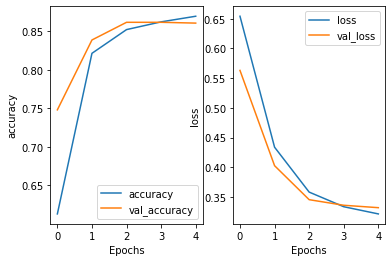

In [ ]:
?plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')


In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state([[0], [2], [3], [4]], [[0], [2], [3], [4]])
m.result().numpy()

1.0

In [ ]:
import copy
vicab2 = copy.deepcopy(vocab)

In [ ]:
vicab2.sort()

In [ ]:
vicab2

array(['', '1', '10', '2', '20', '3', '4', '5', '70s', '80s', '[UNK]',
       'a', 'able', 'about', 'above', 'absolutely', 'across', 'act',
       'acting', 'action', 'actor', 'actors', 'actress', 'actual',
       'actually', 'add', 'admit', 'after', 'again', 'against', 'age',
       'ago', 'air', 'all', 'almost', 'alone', 'along', 'already', 'also',
       'although', 'always', 'am', 'amazing', 'america', 'american',
       'among', 'an', 'and', 'animation', 'annoying', 'another', 'any',
       'anyone', 'anything', 'anyway', 'apart', 'apparently', 'appear',
       'appears', 'are', 'arent', 'around', 'art', 'as', 'ask', 'at',
       'atmosphere', 'attempt', 'attempts', 'attention', 'audience',
       'average', 'avoid', 'away', 'awful', 'b', 'baby', 'back',
       'background', 'bad', 'badly', 'based', 'basically', 'battle', 'be',
       'beautiful', 'beauty', 'became', 'because', 'become', 'becomes',
       'been', 'before', 'begin', 'beginning', 'begins', 'behind',
       'being', 

In [ ]:

lst = []
def func(text, label):
  lst.append([text, label])
  return text, label


test_dataset.map(func)

<MapDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
lst

[[<tf.Tensor 'args_0:0' shape=(None,) dtype=string>,
  <tf.Tensor 'args_1:0' shape=(None,) dtype=int64>]]

In [ ]:
for ele in test_dataset.as_numpy_iterator():
  print (ele)

In [ ]:
tf.keras.models.save_model(model=model, filepath="/content/drive/MyDrive/sentiment/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


In [ ]:
tf.saved_model.save(obj=model, export_dir="/content/drive/MyDrive/sentiment")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


In [ ]:
model.save("/content/drive/MyDrive/sentiment/model", save_format="tf")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/model/assets


In [ ]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [ ]:
input_array = np.random.randint(len(encoder.get_vocabulary()), size=(3, 1))

model_temp = tf.keras.Sequential()
model_temp.add(encoder)
model_temp.add(tf.keras.layers.Embedding( 
    input_dim=len(encoder.get_vocabulary()),
    output_dim=64,
    # Use masking to handle the variable sequence lengths
    mask_zero=True))
model_temp.compile('rmsprop', 'mse')
# output_array = model_temp.predict("hello world this is great!")
# print(output_array.shape)


sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model_temp.predict(np.array([sample_text]))
print(len(predictions))
print(len(predictions[0]))
print(len(predictions[0][0]))





# The model will take as input an integer matrix of size (batch,
# input_length), and the largest integer (i.e. word index) in the input
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch
# dimension.
# input_array = np.random.randint(900, size=(3, 10))
# model_temp.compile('rmsprop', 'mse')
# output_array = model_temp.predict(input_array)
# print(output_array.shape)



1
19
64


In [ ]:
print (output_array[0][0])

[ 0.0051492  -0.01514421  0.0233087  -0.03882884  0.01593846]


In [ ]:
input_array[0][0]

696